# TP 2 - Intégration temporelle

Julien BLANCHON

In [11]:
## Import des libraries
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# Matplotlib formating
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams["figure.autolayout"] = True

# Objectif du TP

L’objectif de ce TP est d’étudier numériquement le comportement des schémas discrets issus de l’application de trois schémas d’intégration temporelle classiques (`Euler explicite`, `RK2`, `Euler implicite`) sur des schémas semi-discrets décentrés d’ordre 1 (`FOU`) et 2 (`UPO2VF`) en espace.

## Rappel du schéma semi-discret **FOU** (schéma décentré amont, $a+$):

$$\frac{d u}{d t}=-\frac{a}{\Delta x}\left(u_{i}-u_{i-1}\right)$$

En intégration temporelle d'`Euler Explicite`
$$u_{i}^{n+1}=u_{i}^{n}-\mathcal{C}\left(u_{i}^{n}-u_{i-1}^{n}\right)$$

In [143]:
def FOU_EE(ui, C=0.5):
    ui_plus = ui - C*(ui - np.roll(ui, shift=+1))
    return ui_plus


## Rappel du schéma semi-discret **FOF** ($a-$):

$$\frac{d u}{d t}=-\frac{a}{\Delta x}\left(u_{i+1}-u_{i}\right)$$

En intégration temporelle d'`Euler Explicite`

$$u_{i}^{n+1}=u_{i}^{n}-\mathcal{C}\left(u_{i+1}^{n}-u_{i}^{n}\right)$$

In [144]:
def FOF_EE(ui, C=0.5):
    ui_plus = ui - C*(np.roll(ui, shift=-1) - ui)
    return ui_plus


## Rappel du schéma semi-discret **SOC** :

$$\frac{d u}{d t}=-\frac{1}{2}\frac{a}{\Delta x}\left(u_{i+1}-u_{i-1}\right)$$

En intégration temporelle d'`Euler Explicite`

$$u_{i}^{n+1}=u_{i}^{n}-\frac{\mathcal{C}}{2}\left(u_{i+1}^{n}-u_{i-1}^{n}\right)$$

In [145]:
def SOC_EE(ui, C=0.5):
    ui_plus = ui - 0.5*C*(np.roll(ui, shift=-1) - np.roll(ui, shift=+1))
    return ui_plus


## Rappel du schéma semi-discret **Lax_Wendroff** :

$$\frac{d u}{d t}=-\frac{1}{2}\frac{a}{\Delta x}\left(u_{i}-u_{i-1}\right) + \frac{1}{2}\left(\frac{a}{\Delta x}\right)^2\left(u_{i+1}-2u_{i} + u_{i-1}\right)$$


En intégration temporelle d'`Euler Explicite`

$$u_{i}^{n+1}=u_{i}^{n}-\frac{\mathcal{C}}{2}\left(u_{i+1}^{n}-u_{i-1}^{n}\right)+\frac{\mathcal{C}^{2}}{2}\left(u_{i+1}^{n}-2 u_{i}^{n}+u_{i-1}^{n}\right)$$

In [146]:
def Lax_Wendroff_EE(ui, C=0.5):
    ui_plus = ui - 0.5*C*(np.roll(ui, shift=-1) - np.roll(ui, shift=+1)) + \
        0.5*C**2*(np.roll(ui, shift=-1) - 2*ui + np.roll(ui, shift=+1))
    return ui_plus


## Rappel du schéma semi-discret **UPO2VF** :

$$\frac{d u}{d t}=-\frac{a}{4 \Delta x}\left(u_{i+1}+3 u_{i}-5 u_{i-1}+u_{i-2}\right)$$

Dans tout le TP, on utilisera la condition initiale ”créneau” définie dans le TP 1 et on observera la solution au terme d’un temps permettant à la solution de revenir à sa position initiale.

In [147]:
# Configuration par defaut
L = 1.0  # Longeur L, 1.0 par défaut
m = 100  # Nombre de point de discrétisation m, par défaut 100
X = np.linspace(start=0, stop=L, num=m)
# X = np.array([i*(L/(m-1)) for i in range(m)])
delta_x = L/(m-1)

In [148]:
# Condition initiale
## Fonction CI1
def CI1(X, beta=2):
    u_zero = np.sin((2*beta*X*np.pi)/L)
    return u_zero

## Fonction CI2
def CI2(X, x0=0.5):
    u_zero = np.array([(0 if xi < x0 else 1) for xi in X])
    return u_zero

# 1 - Schéma d’Euler explicite

Rappel du schéma d’Euler explicite :

$$\delta U=F\left(U^{n}\right) \quad \text { avec } \quad U^{n+1}=U^{n}+\Delta t \delta U$$

$$U^{n+1}=U^{n}+\Delta t F\left(U^{n}\right)$$

$F\left(U^{n}\right)$ est définis par le schéma d'intégration spatiale (FOU, FOF, SOC, Lax Wendroff ...)

In [149]:
def EE(Un, a, Δx, Δt, F):
    Un_plus = Un + Δt*F(Un, a, Δx)
    return Un_plus

## 1) Implémenter les schémas discrets combinant les discrétisations spatiales **FOU** et **UPO2VF** avec le schéma d’Euler explicite


Rappel du schéma semi-discret FOU :

$$\frac{d u}{d t}=-\frac{a}{\Delta x}\left(u_{i}-u_{i-1}\right)$$

$$u_{i}^{n+1}=u_{i}^{n}-\mathcal{C}\left(u_{i}^{n}-u_{i-1}^{n}\right)$$

In [150]:
## Schema FOU - Euler Explicit
def FOU_EE(ui, C=0.5):
    u = ui - C*(ui - np.roll(ui, shift=+1))
    return u

Rappel du schéma semi-discret UPO2VF :

$$\frac{d u}{d t}=-\frac{a}{4 \Delta x}\left(u_{i+1}+3 u_{i}-5 u_{i-1}+u_{i-2}\right)$$

$$u_{i}^{n+1}=u_{i}^{n}-\frac{\mathcal{C}}{4}\left(u_{i+1}^{n}+3 u_{i}^{n}-5 u_{i-1}^{n}+u_{i-2}^{n}\right)$$


In [151]:
## Schema UPO2VF - Euler Explicit
def UPO2VF_EE(ui, C=0.5):
    u = ui - 0.25*C*(
        np.roll(ui, shift=-1) +     #u_{i+1}
        3*np.roll(ui, shift=0) -    #u_{i}
        5*np.roll(ui, shift=+1) +   #u_{i-1}
        np.roll(ui, shift=+2)       #u_{i-2}
    )
    return u

## 2) Tester le programme sur les CFLs 0.1, 0.5 et 1.0 Que peut-on observer avec les deux schémas ?

In [152]:
def plot_sol(schema=FOU_EE, function_name='CI1', L=1, m=50, C=1.0, a=1.0, beta=1, x0=1.0, P=1,
             trace=False, save=False, show=True, ax=plt):
    X = np.linspace(start=0, stop=L, num=m)
    if function_name == "CI1":
        CI = CI1
        u0 = CI(X, beta)
    elif function_name == "CI2":
        CI = CI2
        u0 = CI(X, x0)
    else:
        CI = function_name
        u0 = CI(X)

    delta_x = L/(m-1)
    delta_t = C*delta_x/np.abs(a)
    tMax = int(1/delta_t)
    tMax = int(tMax/P)
    C = np.sign(a)*C

    # t = t_0
    ut = u0
    ax.plot(X, ut)

    # t = t_i
    for t in range(tMax):
        ut = schema(ut, C)
        if trace:
            
            ax.plot(X, ut, c=(t/tMax, 0., 0.), alpha=0.01)

    # t = t_max
    ut = schema(ut, C)
    ax.plot(X, ut)
    ax.grid()
    if ax == plt:
        ax.title(
            f"{CI.__name__}, {schema.__name__}, L={L}, m={m}, C={C}, a={a}, beta={beta}, x0={x0}, Tmax{P}")
        if save:
            ax.savefig(
                f"{CI.__name__}__{schema.__name__}__L={L}__m={m}__C={C}__a={a}__beta={beta}__x0={x0}__Tmax{P}.png")
        if show:
            ax.show()


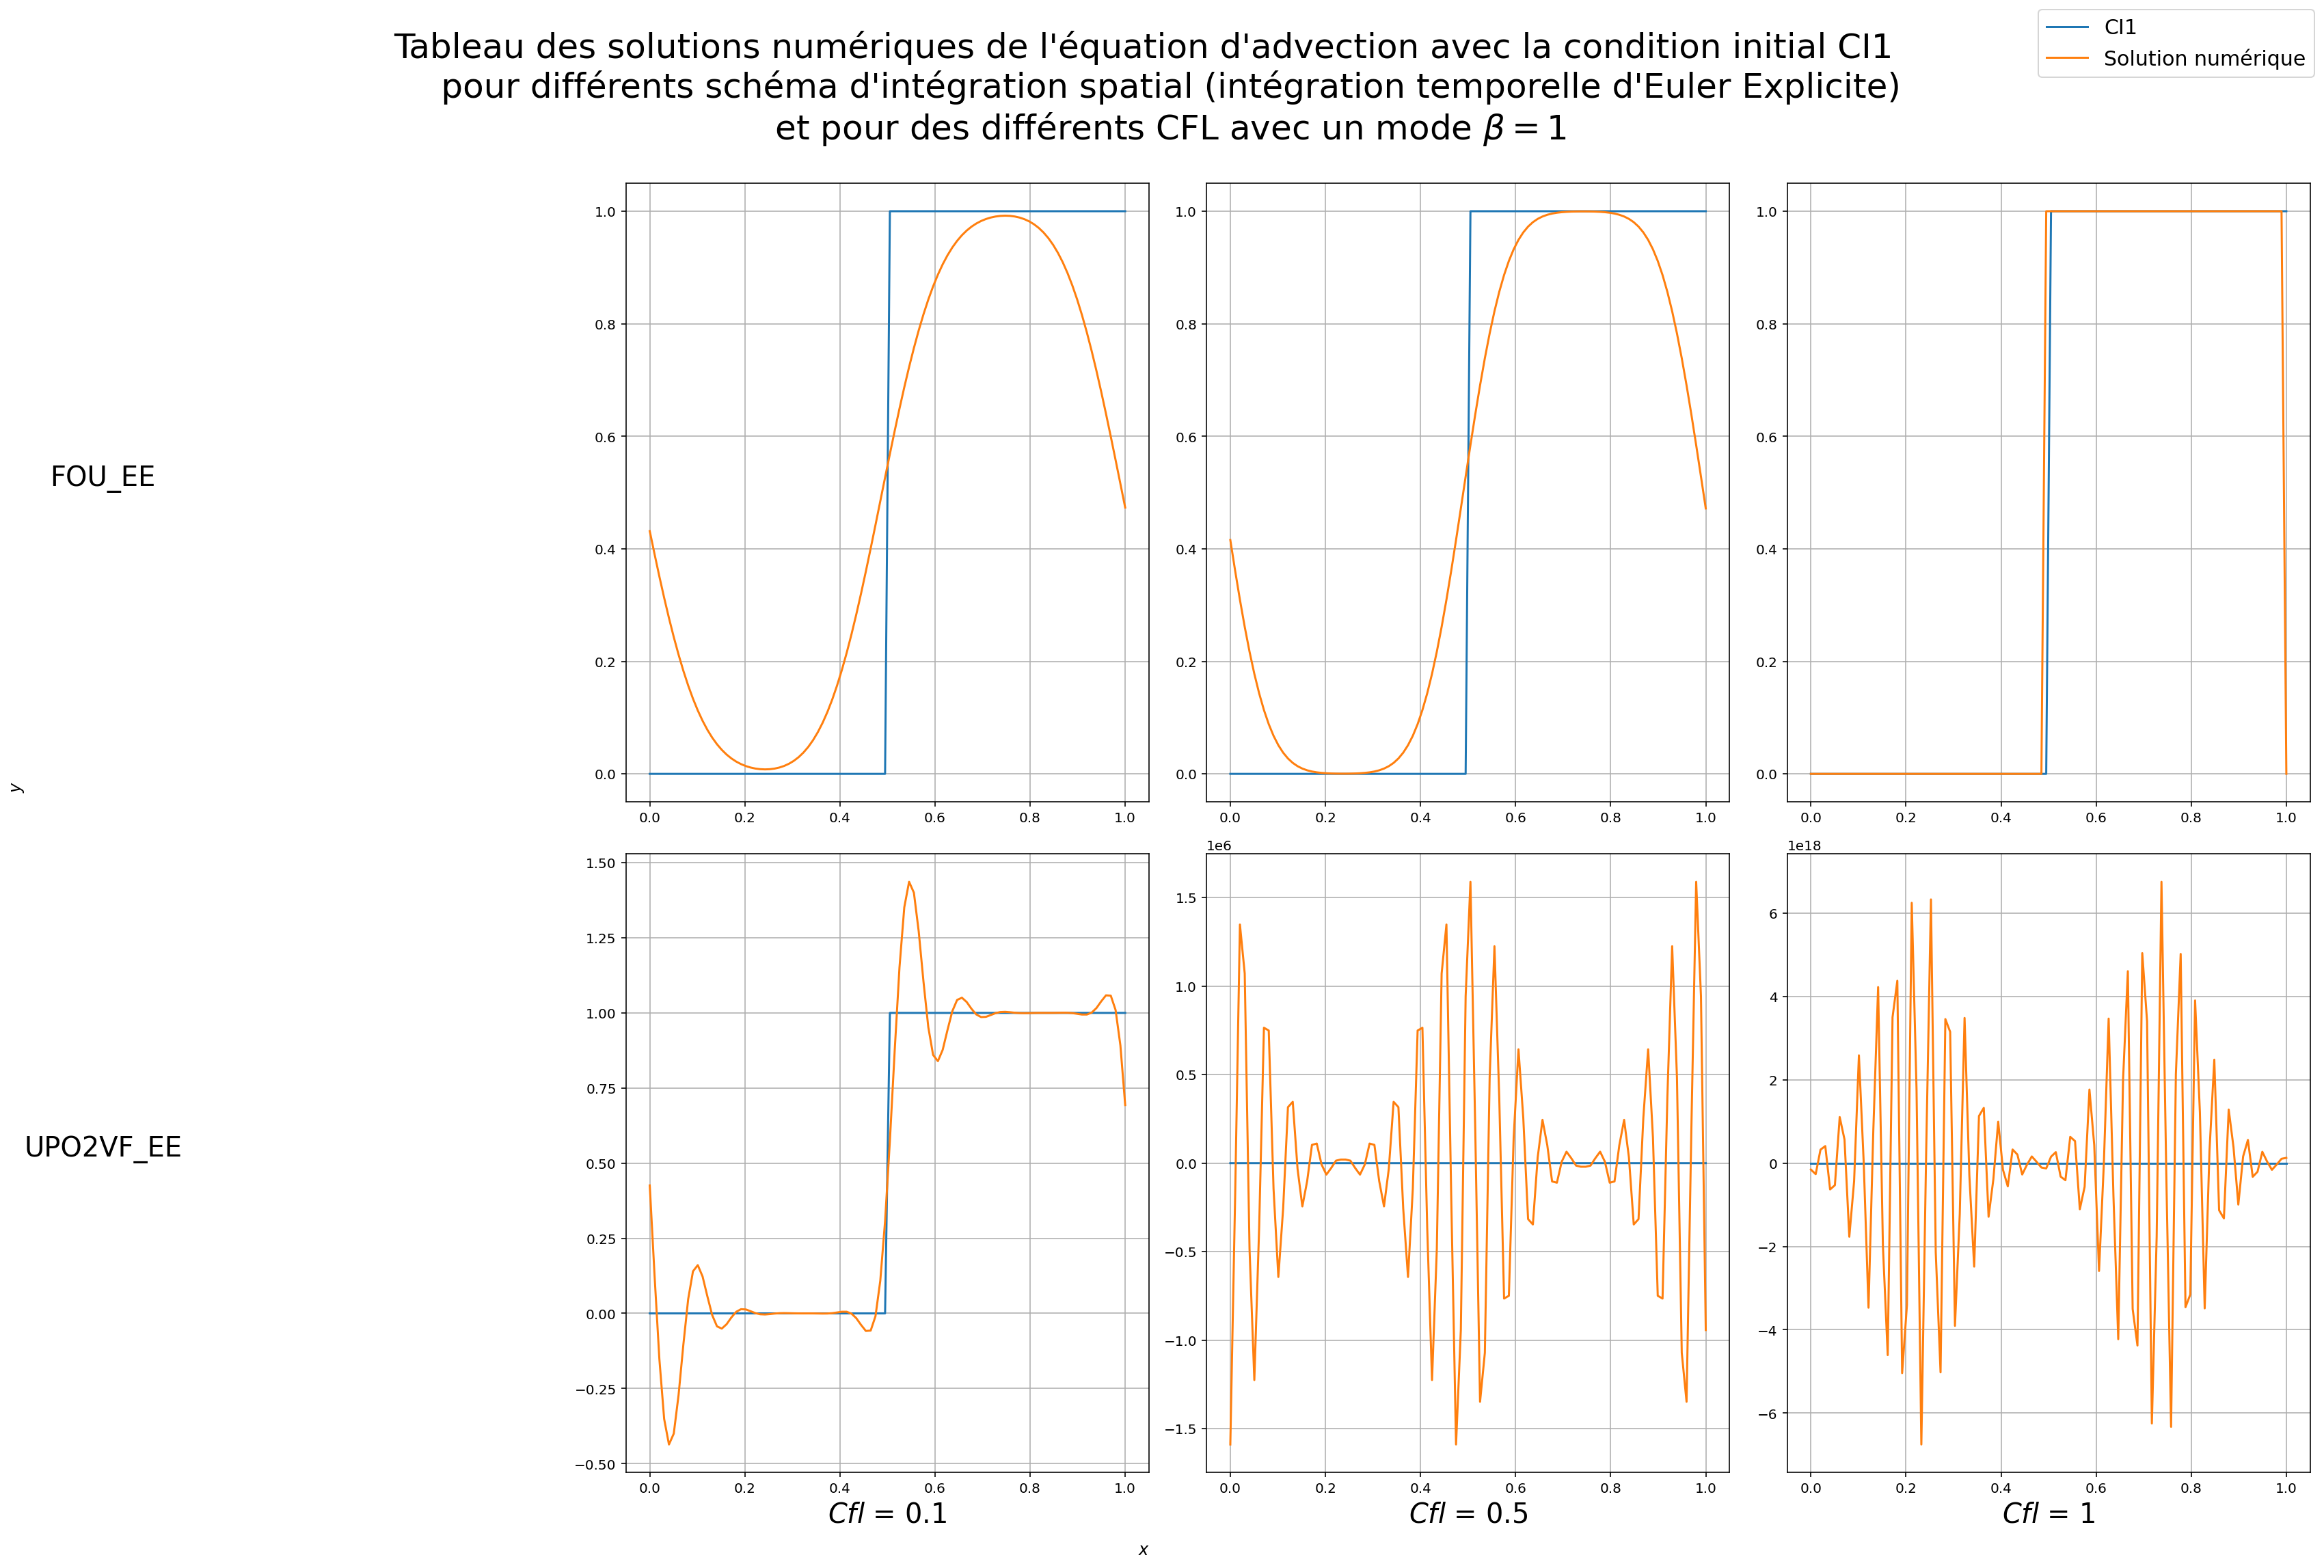

In [153]:
# Variation des solutions selon CFL

cfl_list = [0.1, 0.5, 1]
schema_list = [FOU_EE, UPO2VF_EE]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(cfl_list), figsize=(24, 16))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial (intégration temporelle d'Euler Explicite)\n \
    et pour des différents CFL avec un mode $\\beta = 1$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")
for i, schema in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{schema.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, cfl in enumerate(cfl_list):
        axs[-1, j].set_xlabel(f"$Cfl$ = {cfl}", rotation=0,
                              size=20)
        #axs[-1, j].grid()
        plot_sol(schema=schema, function_name='CI2', L=1,
                 m=100, C=cfl, a=1.0, beta=1, x0=0.5, P=1, ax=axs[i, j])
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()


On voit clairement que les conditions de stabilités d'`UPO2VF_EE` sont beaucoup plus restrictive que pour `FOU_EE`. Pour un $\mathcal{C} > 0.1$, `UPO2VF_EE` diverge.

# 2 - Schéma de Runge-Kutta explicite d’ordre deux

Rappel du schéma de Runge-Kutta explicite d’ordre deux :

$$\left\{\begin{array} { l } 
{ \delta U ^ { \star } = F ( U ^ { n } ) } \\
{ \delta U = \frac { 1 } { 2 } F ( U ^ { \star } ) + \frac { 1 } { 2 } F ( U ^ { n } ) }
\end{array} \quad \text { avec } \quad \left\{\begin{array}{ll}
U^{\star} & =U^{n}+\Delta t \delta U^{\star} \\
U^{n+1} & =U^{n}+\Delta t \delta U
\end{array}\right.\right.
$$

- Schéma explicite à un pas et deux étapes
- Améliore la stabilité et la précision de la méthode d’Euler en faisant
une évaluation supplémentaire des états entre $t_n$ et $t_{n+1}$
- Coût par itération presque deux fois supérieur à celui du schéma
d’Euler explicite
- Possibilité de faire des étapes supplémentaires afin de monter en
ordre et d’élargir (modestement) le domaine de stabilité
- Précis à l’ordre deux en temps

## 1) Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma de Runge-Kutta explicite

In [154]:
## Schema FOU - Runge Kutta
def FOU_RK(ui, C=0.5):
    ui_star = FOU_EE(ui, C)
    u = ui - 0.5*C*(ui - np.roll(ui, shift=+1)) - \
        0.5*C*(ui_star - np.roll(ui_star, shift=+1))
    return u

In [155]:
## Schema FOU - Runge Kutta
def UPO2VF_RK(ui, C=0.5):
    ui_star = UPO2VF_EE(ui, C)
    u = ui - \
        0.5*0.25*C*(
            np.roll(ui, shift=-1) +  # u_{i+1}
            3*np.roll(ui, shift=0) -  # u_{i}
            5*np.roll(ui, shift=+1) +  # u_{i-1}
            np.roll(ui, shift=+2)  # u_{i-2}
        ) - \
        0.5*0.25*C*(
            np.roll(ui_star, shift=-1) +  # u_{i+1}
            3*np.roll(ui_star, shift=0) -  # u_{i}
            5*np.roll(ui_star, shift=+1) +  # u_{i-1}
            np.roll(ui_star, shift=+2)  # u_{i-2}
        )
    return u


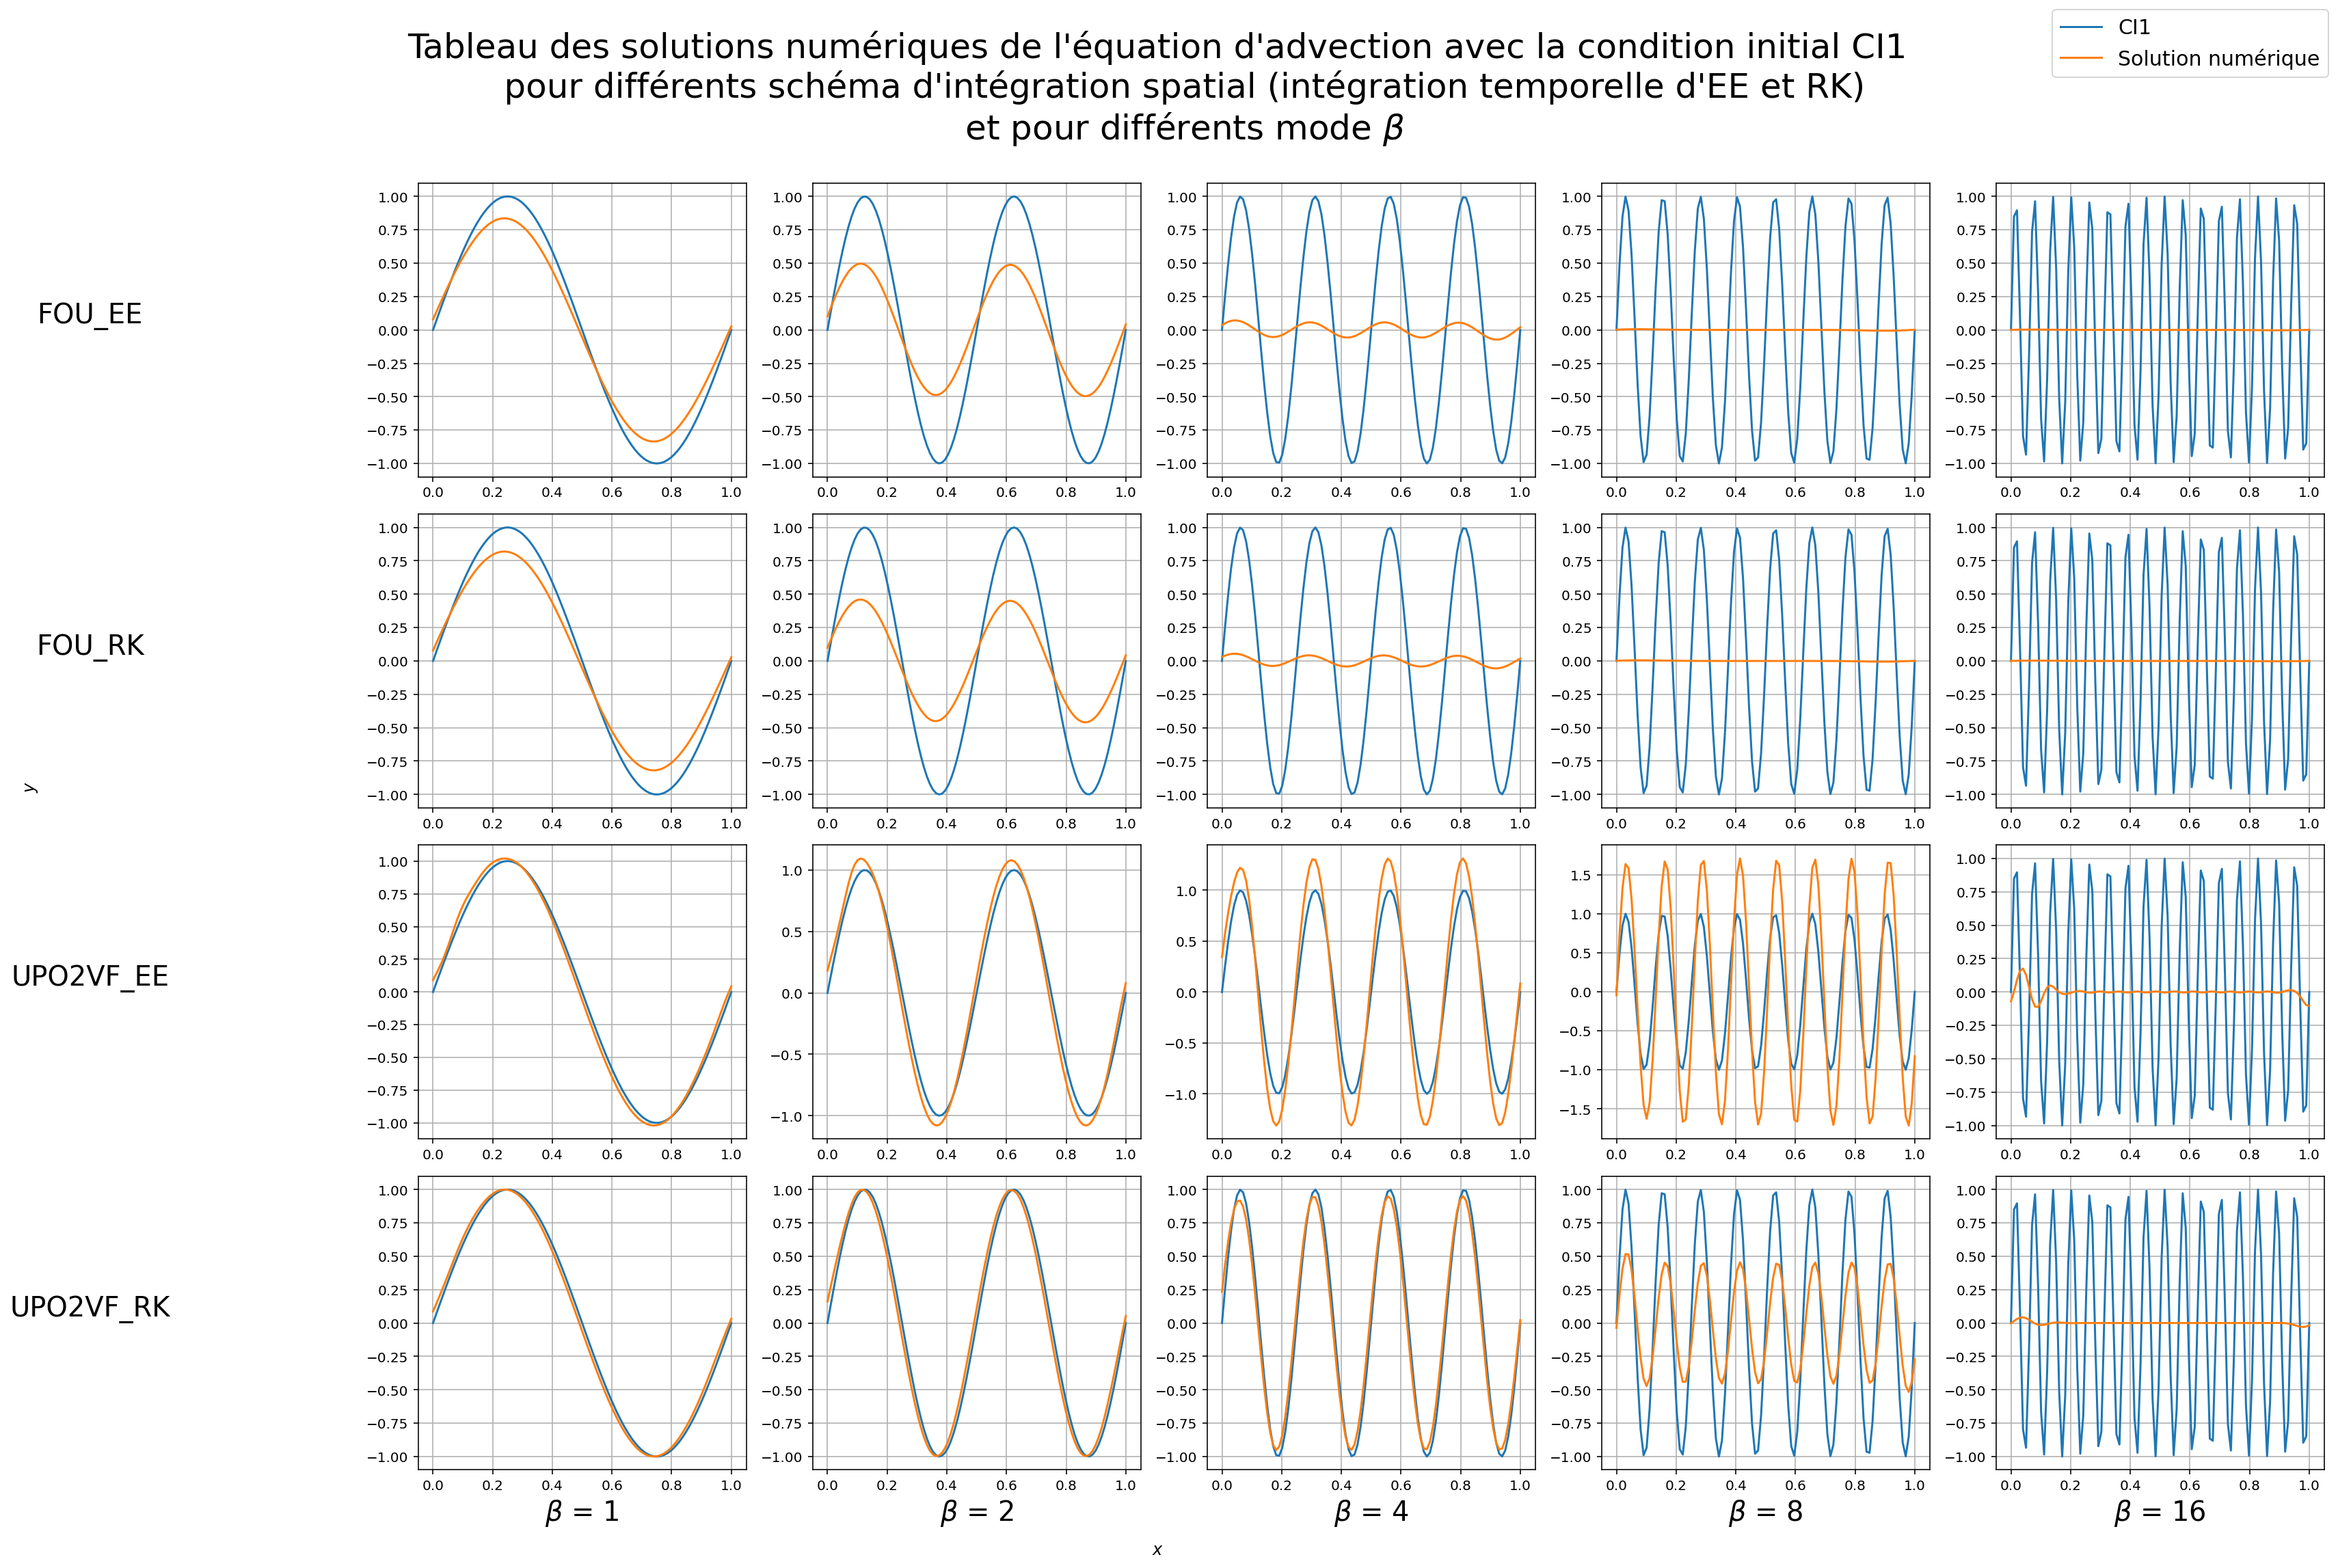

In [156]:
# Variation des solutions selon le mode beta

beta_list = [1, 2, 4, 8, 16]
schema_list = [FOU_EE, FOU_RK, UPO2VF_EE, UPO2VF_RK]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(beta_list), figsize=(24, 16))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial (intégration temporelle d'EE et RK)\n \
    et pour différents mode $\\beta$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")

for i, schema in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{schema.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, beta in enumerate(beta_list):
        axs[-1, j].set_xlabel(f"$\\beta$ = {beta}", rotation=0,
                              size=20)
        plot_sol(schema=schema, function_name='CI1', L=1,
                 m=100, C=0.1, a=1.0, beta=beta, x0=0.5, P=1, ax=axs[i, j], trace=False)
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()


## 2) Tester le programme sur les CFLs 0.1, 0.5 et 1. Que peut-on observer avec les deux schémas 

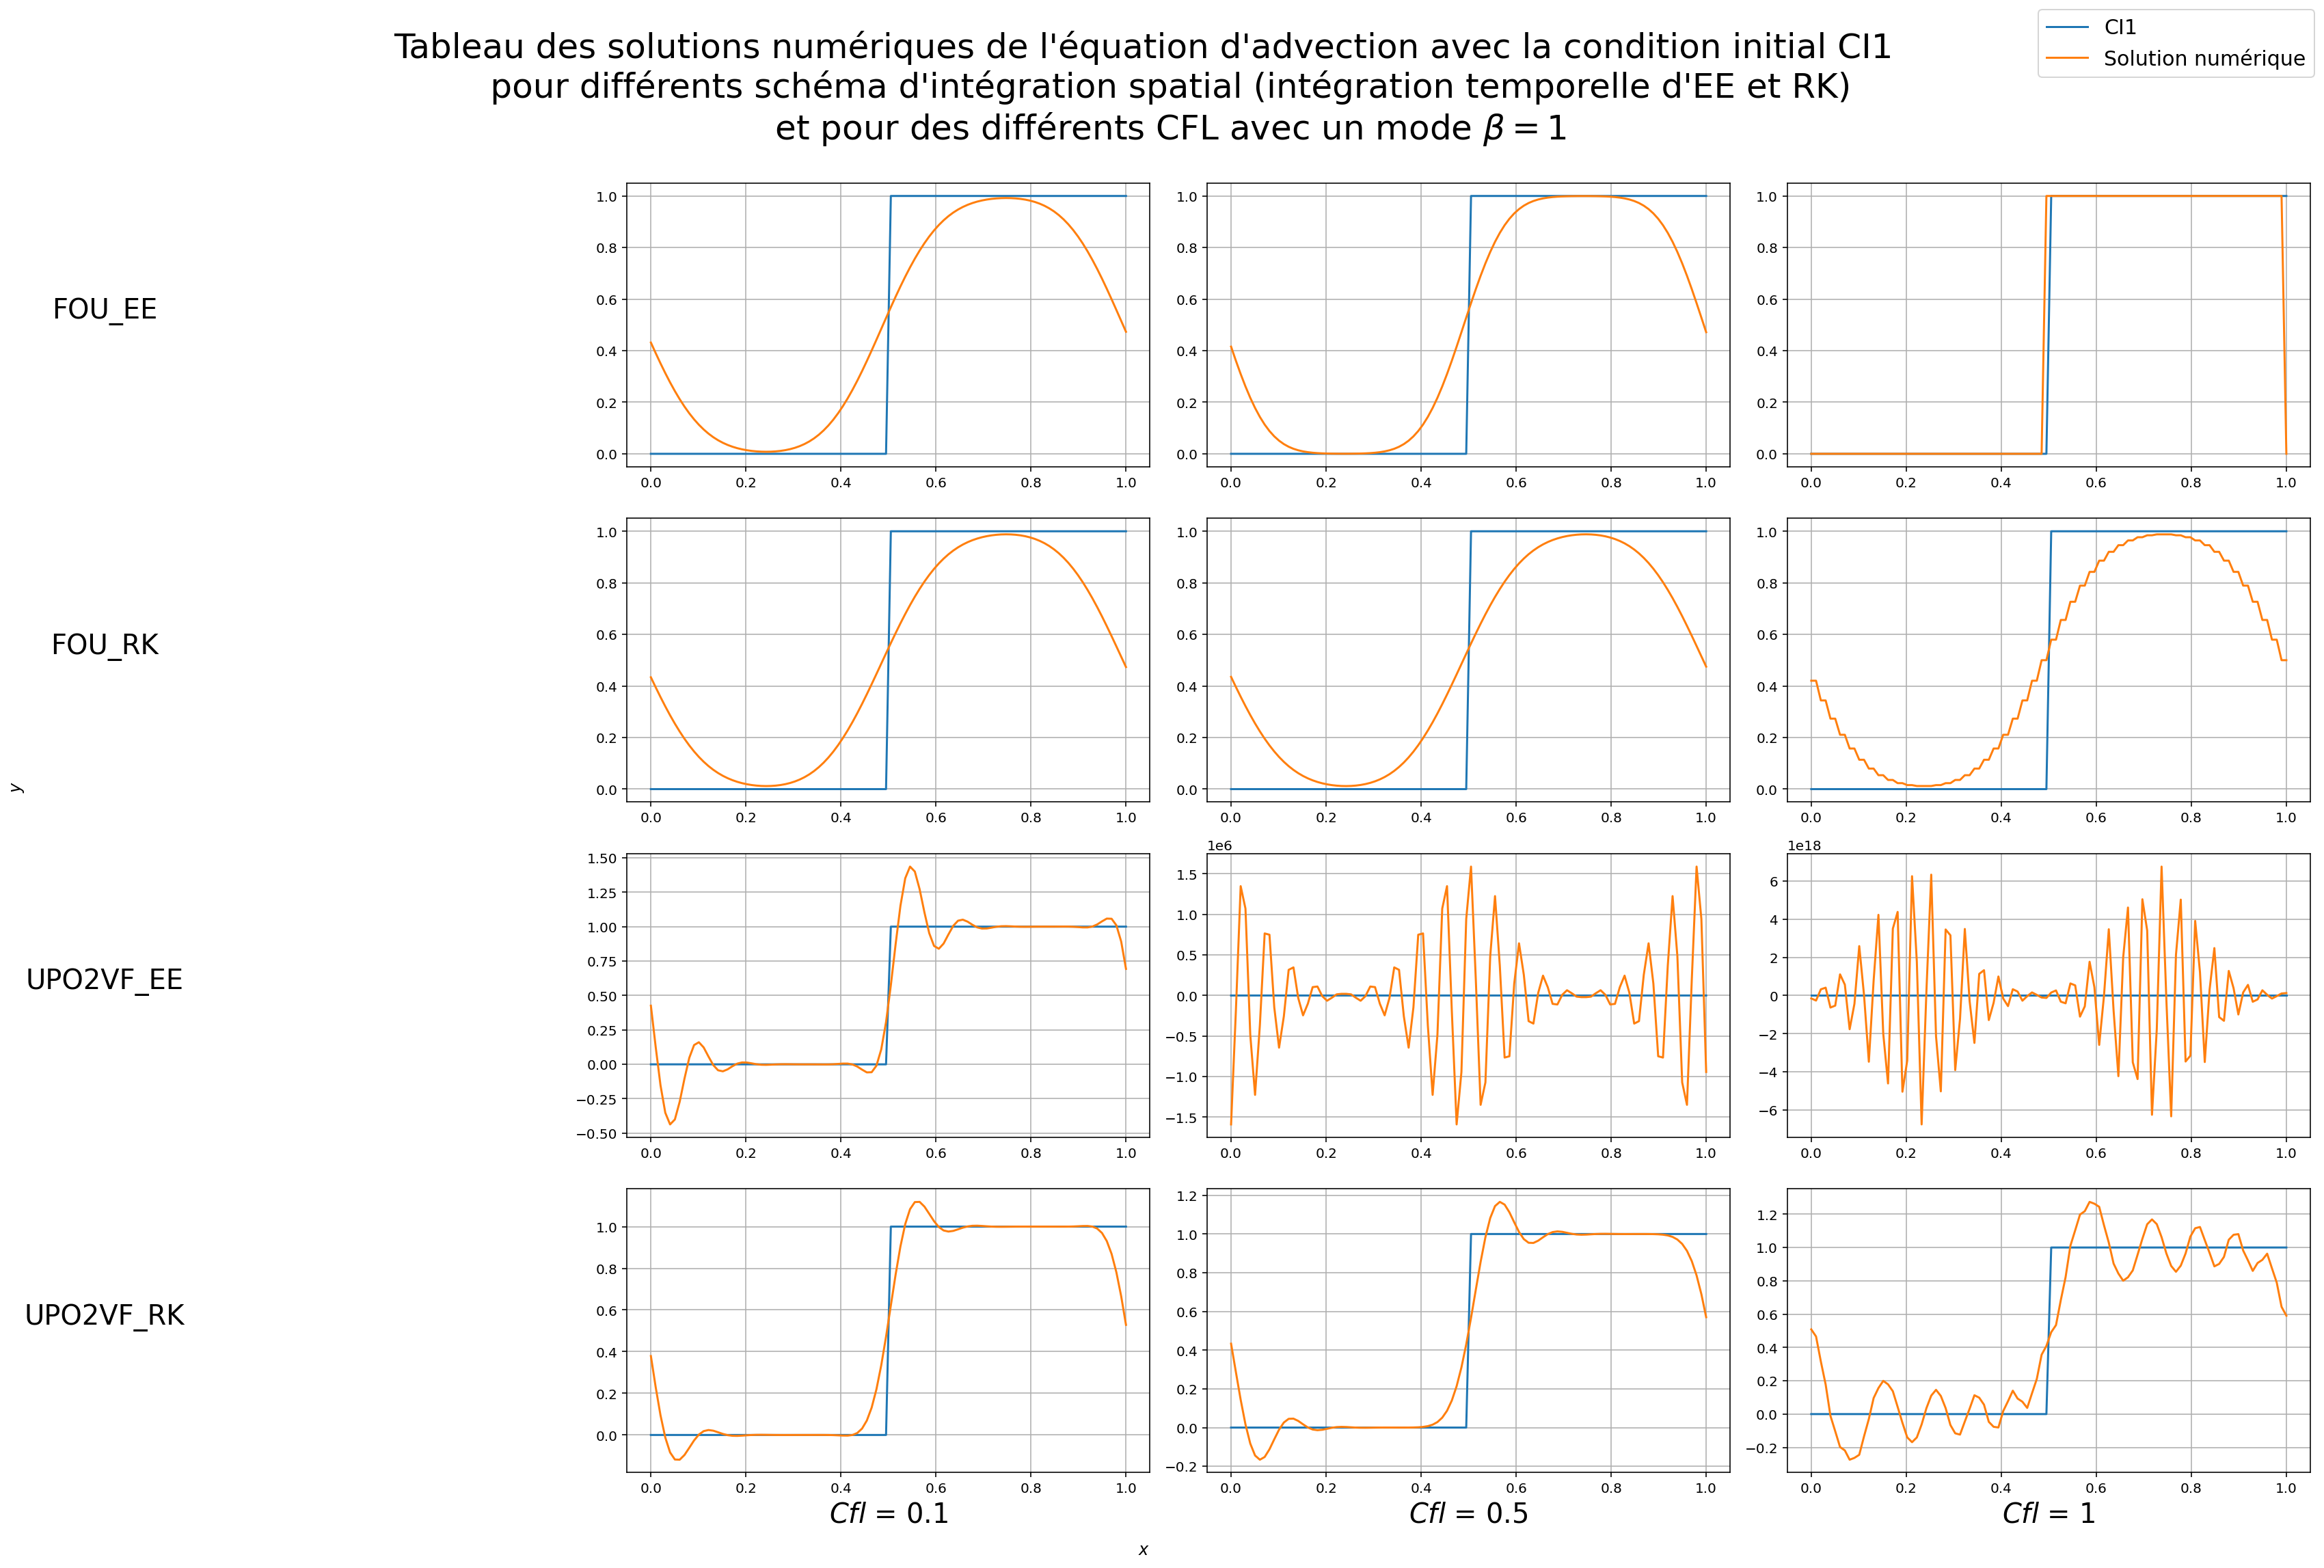

In [157]:
# Variation des solutions selon CFL

cfl_list = [0.1, 0.5, 1]
schema_list = [FOU_EE, FOU_RK, UPO2VF_EE, UPO2VF_RK]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(cfl_list), figsize=(24, 16))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial (intégration temporelle d'EE et RK)\n \
    et pour des différents CFL avec un mode $\\beta = 1$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")
for i, schema in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{schema.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, cfl in enumerate(cfl_list):
        axs[-1, j].set_xlabel(f"$Cfl$ = {cfl}", rotation=0,
                              size=20)
        #axs[-1, j].grid()
        plot_sol(schema=schema, function_name='CI2', L=1,
                 m=100, C=cfl, a=1.0, beta=1, x0=0.5, P=1, ax=axs[i, j])
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()

Alors que `UPO2VF_EE` était instable pour $\mathcal{C} > 0.1$, `UPO2VF_RK` est beaucoup plus stable.

L'intégration temporelle d'`EE` est d'ordre $1$ en temps alors que `RK` qui effectue des évaluations suplémentaires plus est d'ordre $2$, on a donc un gain de stabilité de l'intégrateur numérique.

# 3 Schéma d’Euler implicite

Rappel du schéma d’Euler implicite :

$$\delta U=F\left(U^{n+1}\right) \quad \text { avec } \quad U^{n+1}=U^{n}+\Delta t \delta U$$

## 1. Implémenter les schémas discrets combinant les discrétisations spatiales FOU et UPO2VF avec le schéma d’Euler implicite

In [158]:
## Schema FOU - Euler Explicit
def FOU_EI(ui, C=0.5):
    # U_{n+1} = U_{n} + J*U_{n+1}
    # (I - J)U_{n+1} = U_{n}
    # U_{n+1}*A = U_{n}
    # U_{n+1} = U_{n}/(I - J)
    # 
    n = len(ui)
    I = np.identity(n)
    # u = ui - C*(ui - np.roll(ui, shift=+1))
    J = C*(
        np.roll(I, shift=0, axis=1) -
        np.roll(I, shift=+1, axis=1)
    )
    u = np.linalg.solve(I+J, ui)
    return u

In [159]:
I = np.identity(5)
J = np.roll(I, shift=-1, axis=1)
I+J

array([[1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.]])

In [160]:
## Schema UPO2VF - Euler Explicit
def UPO2VF_EI(ui, C=0.5):
    # U_{n+1} = U_{n} + J*U_{n+1}
    # (I - J)U_{n+1} = U_{n}
    # Ax = b
    # U_{n+1} = U_{n}/(I - J)
    n = len(ui)
    I = np.identity(n)
    # u = ui - 0.25*C*(
    #     np.roll(ui, shift=-1) +  # u_{i+1}
    #     3*np.roll(ui, shift=0) -  # u_{i}
    #     5*np.roll(ui, shift=+1) +  # u_{i-1}
    #     np.roll(ui, shift=+2)  # u_{i-2}
    # )
    J = 0.25*C*( #PB ICI
        np.roll(I, shift=-1, axis=1) +
        3*np.roll(I, shift=0, axis=1) -
        5*np.roll(I, shift=+1, axis=1) +
        np.roll(I, shift=+2, axis=1)
    )
    u = np.linalg.solve(I+J, ui)
    return u

In [161]:
I = np.identity(8)
J = 0.25*(  # PB ICI
    np.roll(I, shift=-1, axis=1) +
    np.roll(I, shift=0, axis=1) -
    np.roll(I, shift=+1, axis=1) +
    np.roll(I, shift=+2, axis=1)
)

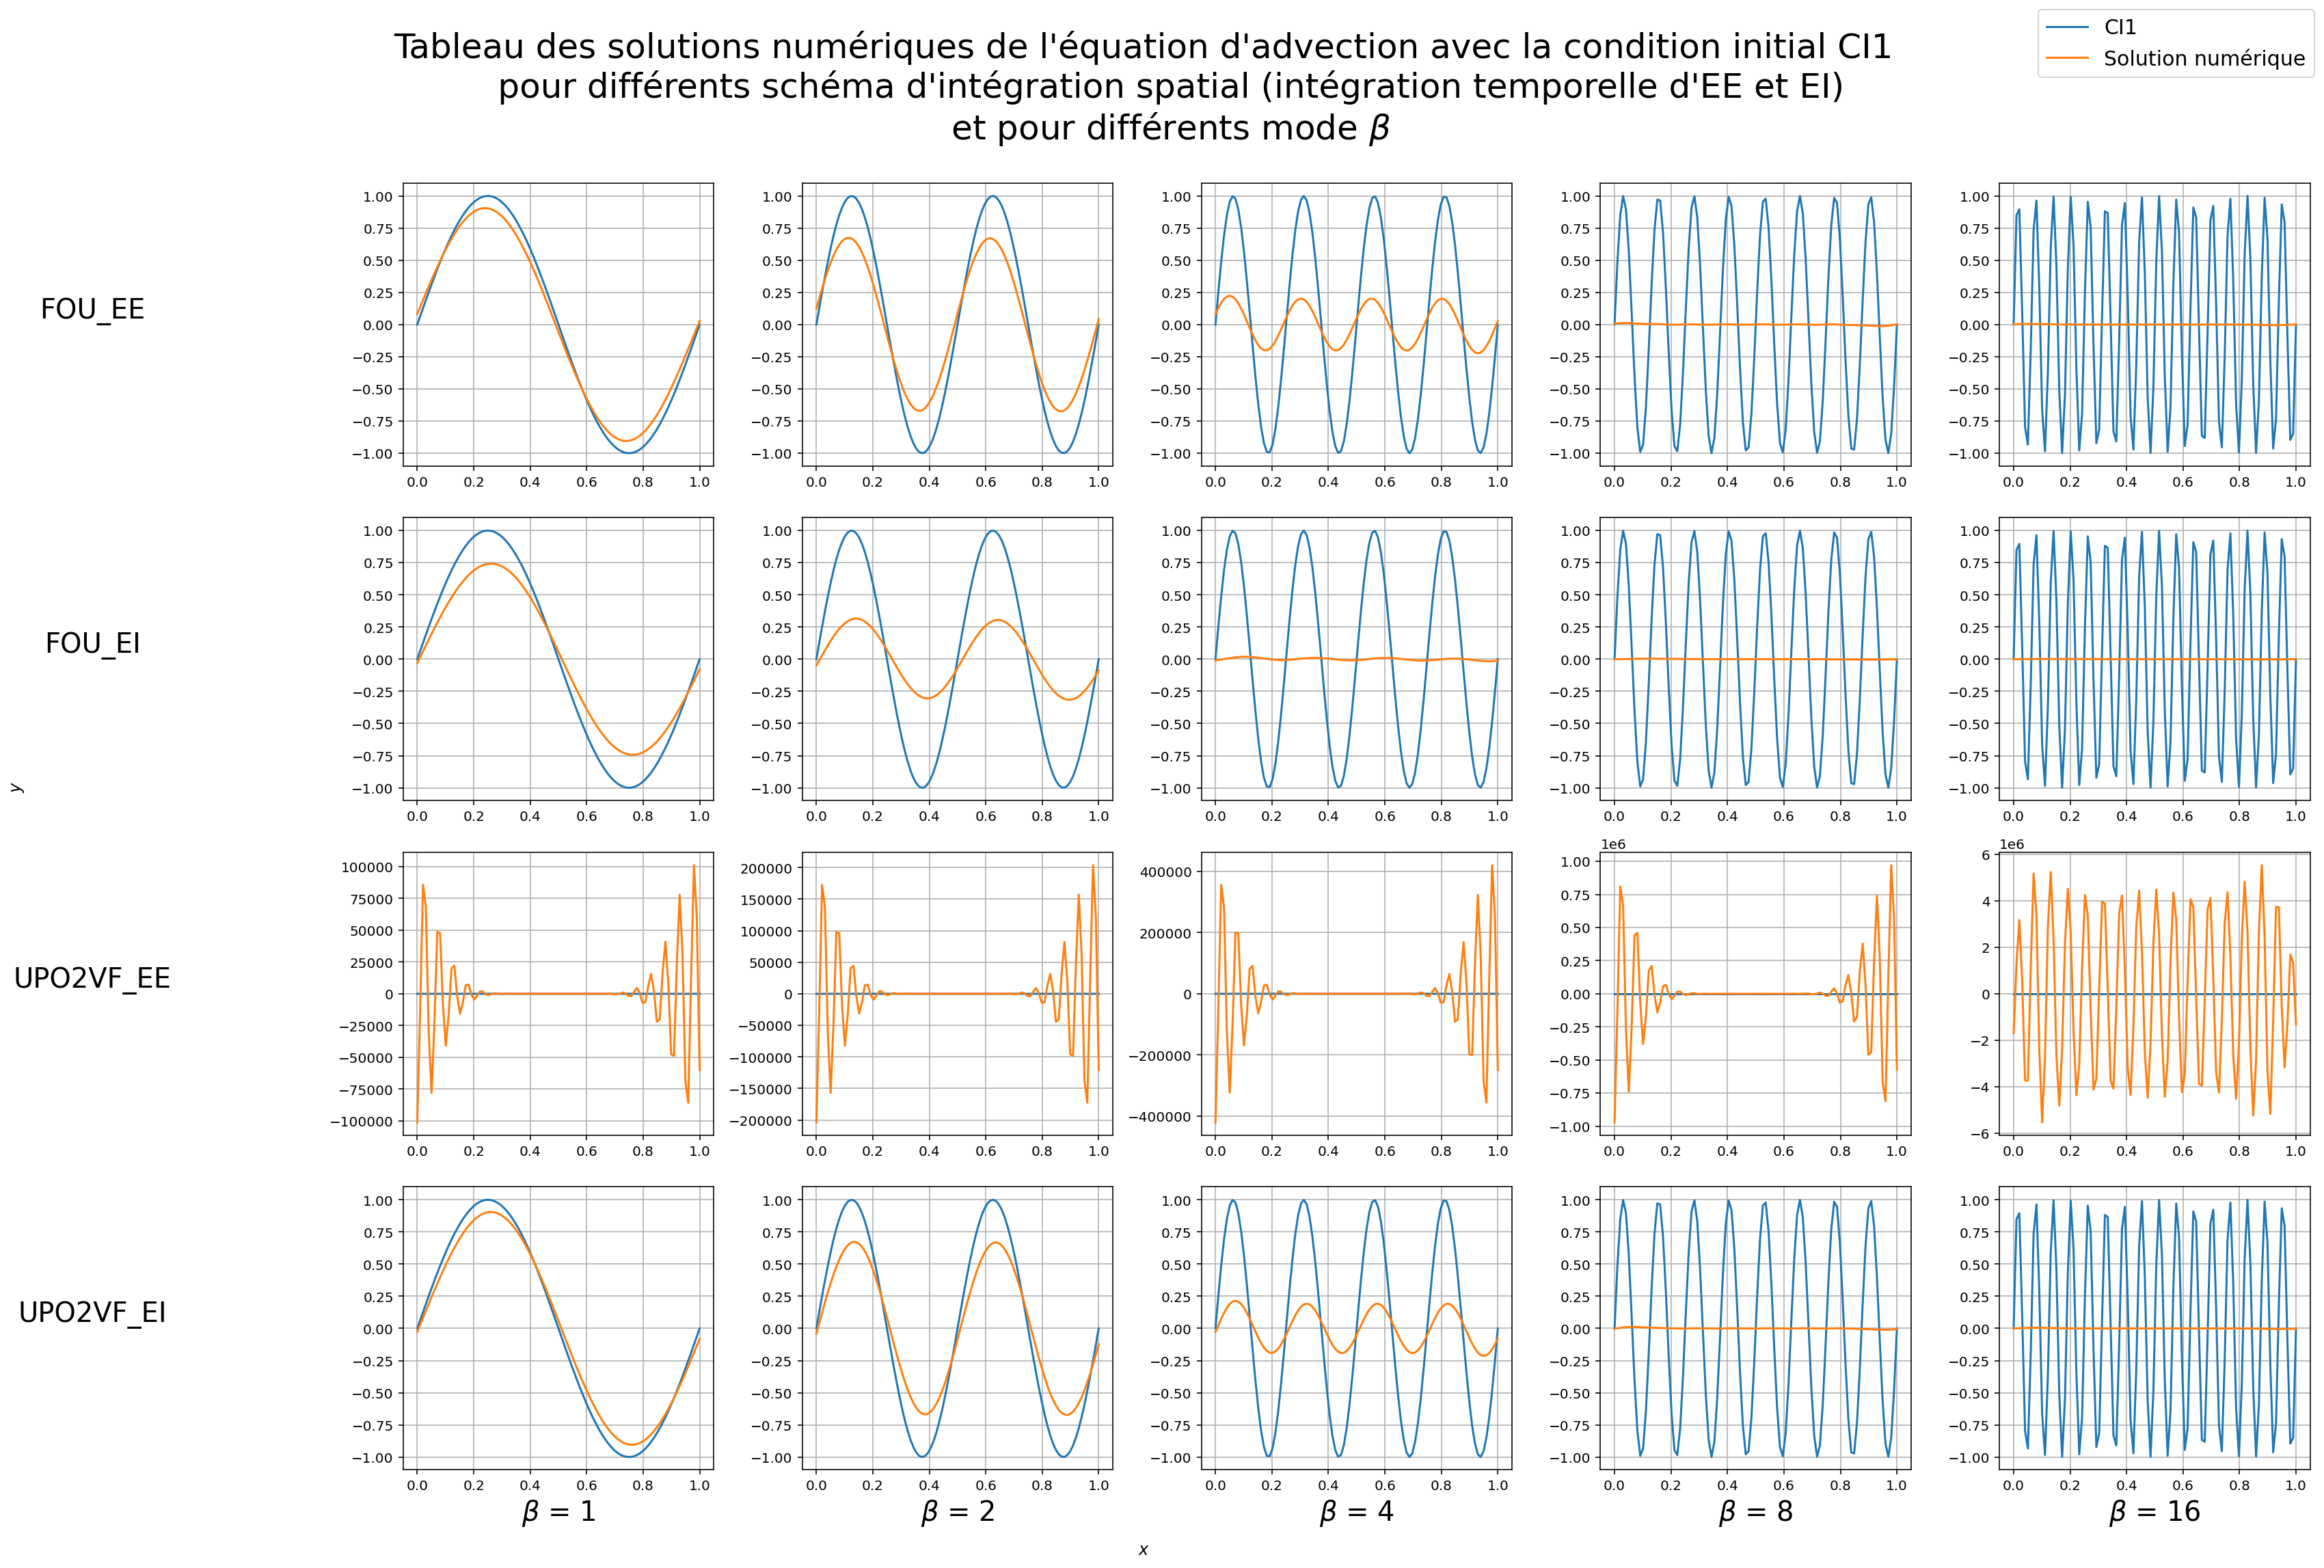

In [ ]:
# Variation des solutions selon le mode beta

beta_list = [1, 2, 4, 8, 16]
schema_list = [FOU_EE, FOU_EI, UPO2VF_EE, UPO2VF_EI]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(beta_list), figsize=(24, 16))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial (intégration temporelle d'EE et EI)\n \
    et pour différents mode $\\beta$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")

for i, schema in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{schema.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, beta in enumerate(beta_list):
        axs[-1, j].set_xlabel(f"$\\beta$ = {beta}", rotation=0,
                              size=20)
        plot_sol(schema=schema, function_name='CI1', L=1,
                 m=100, C=0.1, a=1.0, beta=beta, x0=0.5, P=1, ax=axs[i, j], trace=False)
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()


##  2. Tester le programme sur les CFLs 0.1, 0.5, 1, 10 et 20. Que peut-on observer avec les deux schémas 

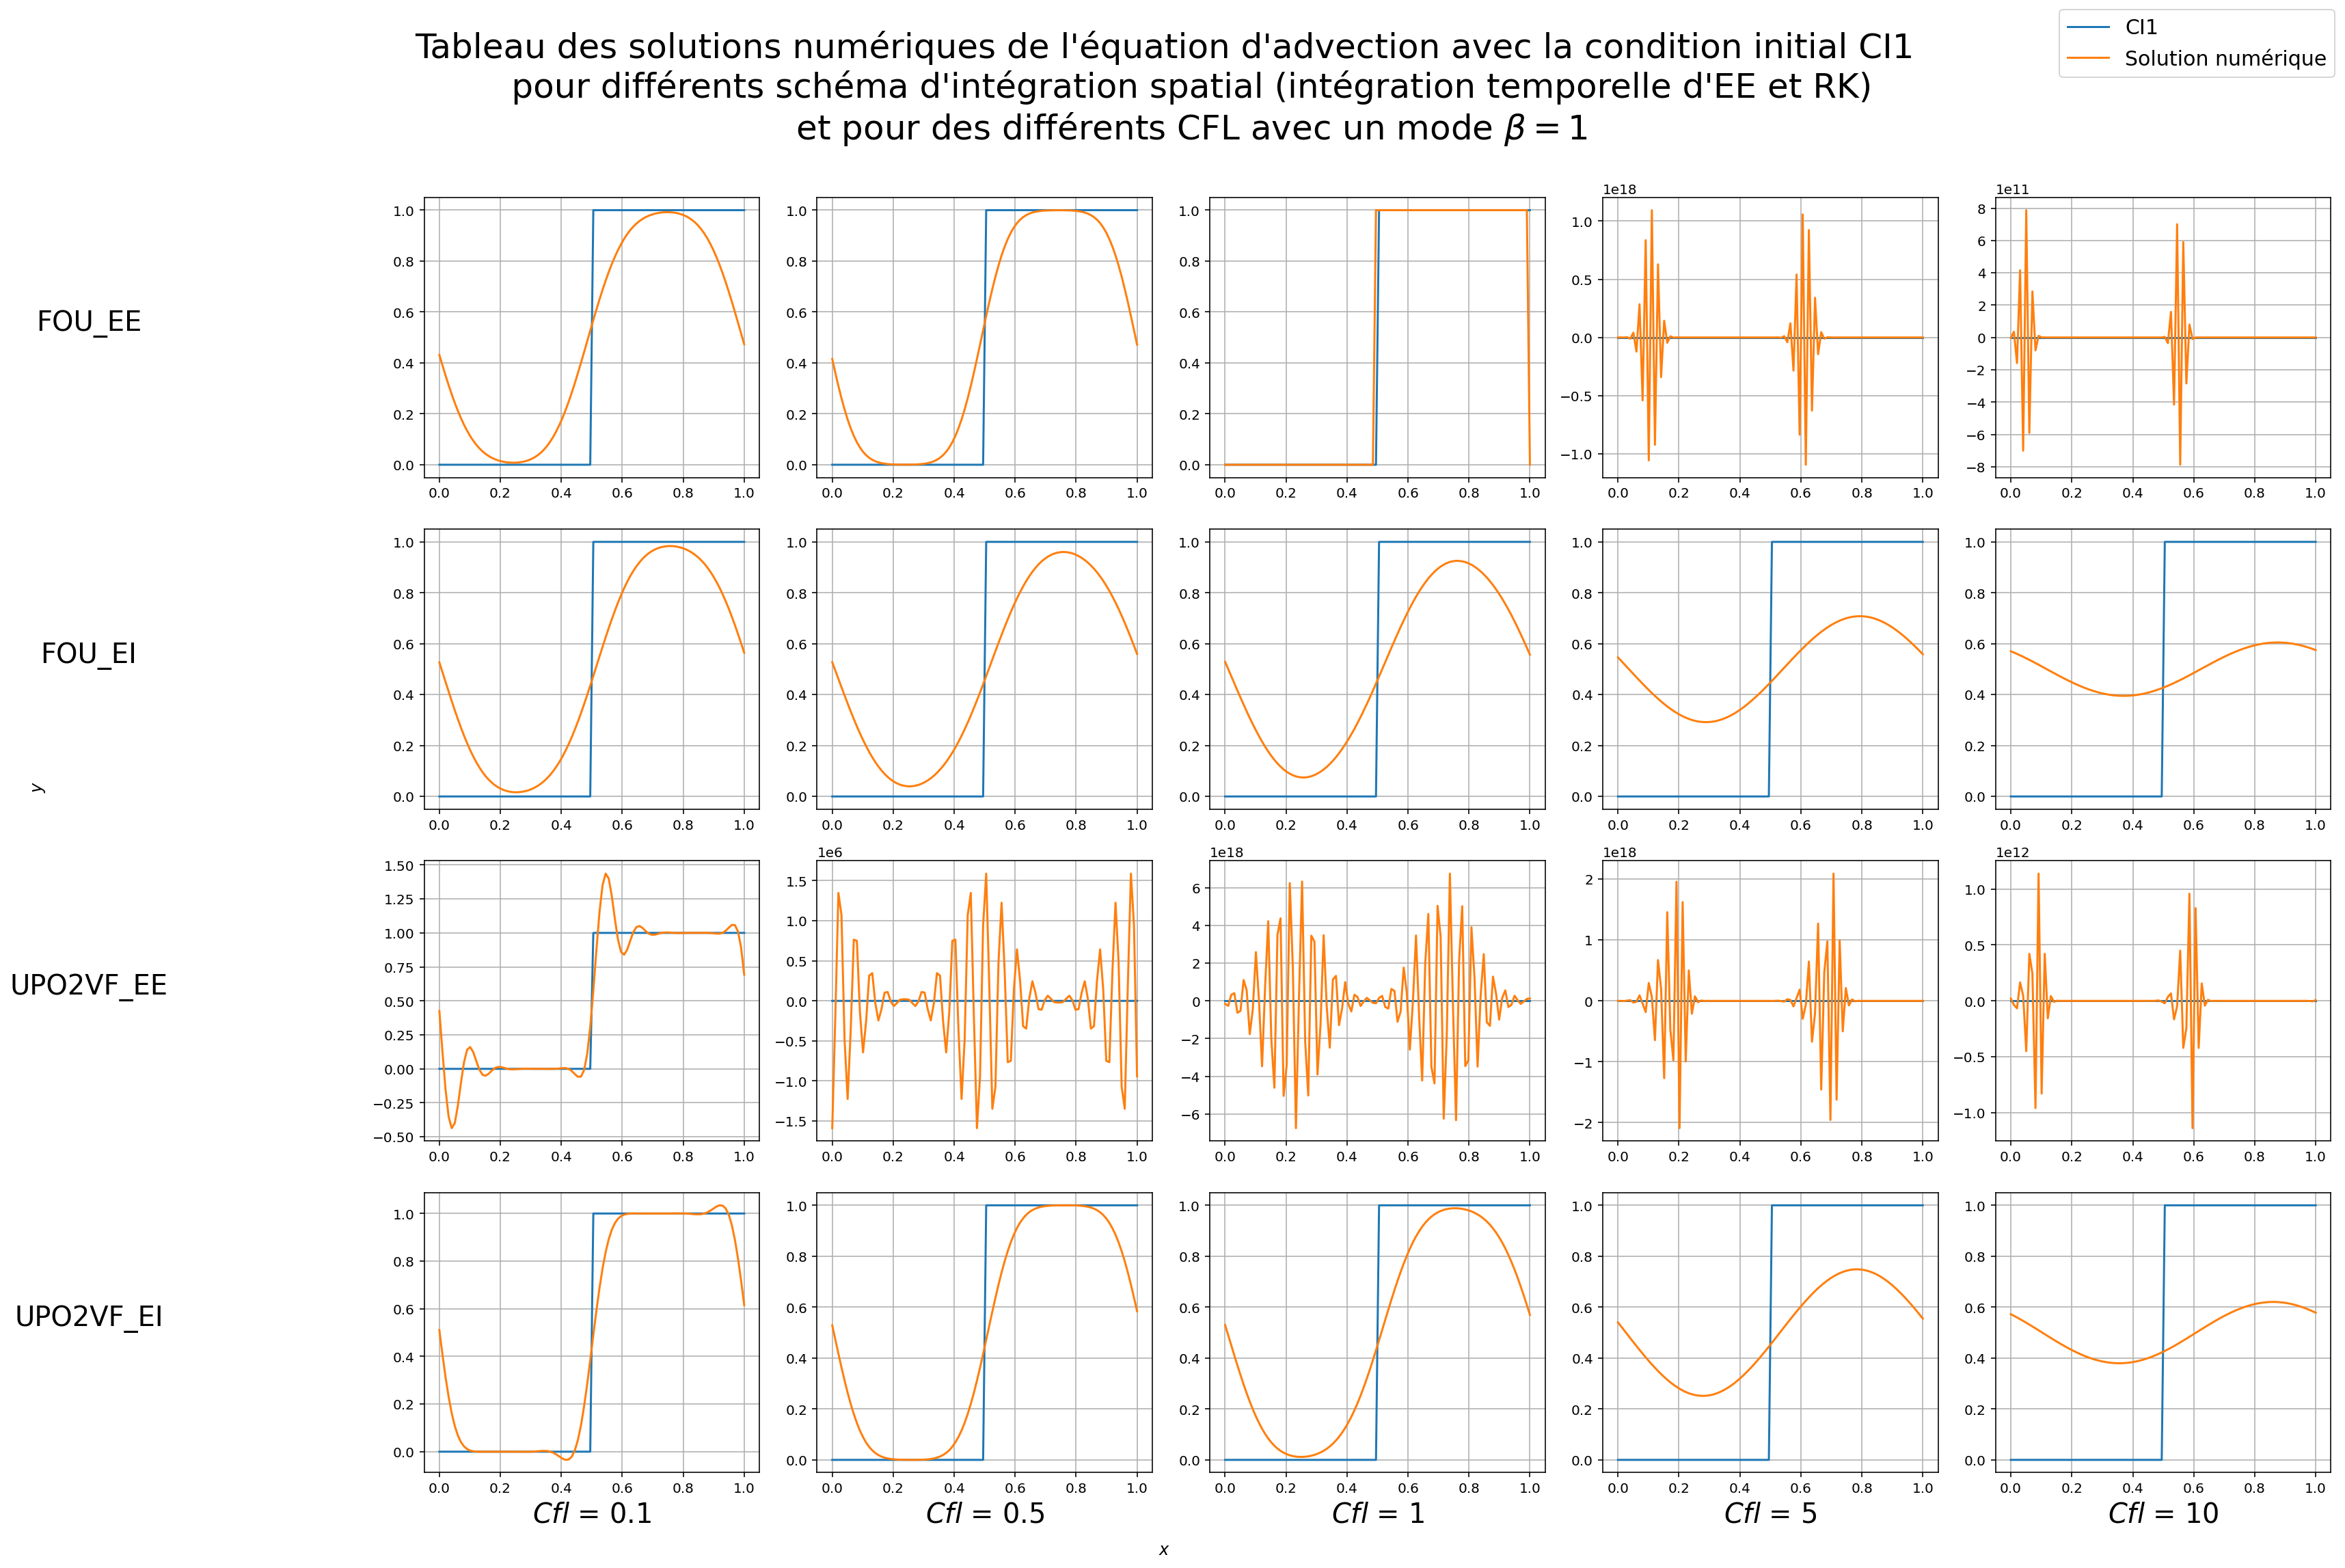

In [163]:
# Variation des solutions selon CFL

cfl_list = [0.1, 0.5, 1, 5, 10]
schema_list = [FOU_EE, FOU_EI, UPO2VF_EE, UPO2VF_EI]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(cfl_list), figsize=(24, 16))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial (intégration temporelle d'EE et RK)\n \
    et pour des différents CFL avec un mode $\\beta = 1$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")
for i, schema in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{schema.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, cfl in enumerate(cfl_list):
        axs[-1, j].set_xlabel(f"$Cfl$ = {cfl}", rotation=0,
                              size=20)
        #axs[-1, j].grid()
        plot_sol(schema=schema, function_name='CI2', L=1,
                 m=100, C=cfl, a=1.0, beta=1, x0=0.5, P=1, ax=axs[i, j])
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()


Avec `Euler Implicit` nos schéma sont maintenant inconditionellement stable, cependant les solutions on tendance à s'écraser quand $\mathcal{C}$ augmente. Les solutions sont aussi beaucoup plus fine, l'inconvéniant d'Euler Implicit est qu'il est donc beaucoup plus gourmand en terme de besoin CPU (résolution système linéaire $U=JU$) et mémoire (stockage de matrice $J$).

# Bonus - Sépation intégration temps et espace:

## Intégration en espace :

$$\frac{d u}{d t}=-\frac{a}{\Delta x}\left(u_{i}-u_{i-1}\right)$$

In [164]:
## Schema FOU
def FOU(ui, a, Δx):
    Δdu = - (a/Δx)*(ui - np.roll(ui, shift=+1))
    return Δdu

$$\frac{d u}{d t}=-\frac{a}{\Delta x}\left(u_{i+1}-u_{i}\right)$$

In [165]:
## Schema FOF
def FOF(ui, a, Δx):
    Δdu = - (a/Δx)*(np.roll(ui, shift=-1) - ui)
    return Δdu


$$\frac{d u}{d t}=-\frac{1}{2}\frac{a}{\Delta x}\left(u_{i+1}-u_{i-1}\right)$$


In [166]:
## Schema SOC
def SOC(ui, a, Δx):
    Δdu = - 0.5*(a/Δx)*(np.roll(ui, shift=-1) - np.roll(ui, shift=+1))
    return Δdu

$$\frac{d u}{d t}=-\frac{1}{2}\frac{a}{\Delta x}\left(u_{i}-u_{i-1}\right) + \frac{1}{2}\left(\frac{a}{\Delta x}\right)^2\left(u_{i+1}-2u_{i} + u_{i-1}\right)$$


In [167]:
## Schema Lax Wendroff
def Lax_Wendroff(ui, a, Δx):
    Δdu = - 0.5*(a/Δx)*(np.roll(ui, shift=-1) - np.roll(ui, shift=+1)) + \
        0.5*(a/Δx)**2*(np.roll(ui, shift=-1) - 2*ui + np.roll(ui, shift=+1))
    return Δdu


In [168]:
## Schema UPO2VF
def UPO2VF(ui, a, Δx):
    u = - 0.25*(a/Δx)*(
        np.roll(ui, shift=-1) +  # u_{i+1}
        3*np.roll(ui, shift=0) -  # u_{i}
        5*np.roll(ui, shift=+1) +  # u_{i-1}
        np.roll(ui, shift=+2)  # u_{i-2}
    )
    return u


## Intégration en temps

Rappel du schéma d’Euler explicite :

$$\delta U=F\left(U^{n}\right) \quad \text { avec } \quad U^{n+1}=U^{n}+\Delta t \delta U$$

$$U^{n+1}=U^{n}+\Delta t F\left(U^{n}\right)$$

$F\left(U^{n}\right)$ est définis par le schéma d'intégration spatiale (FOU, FOF, SOC, Lax Wendroff ...)

In [169]:
def EE(Un, a, Δx, Δt, F):
    δU = F(Un, a, Δx)
    Un_plus = Un + Δt*δU
    return Un_plus

Rappel du schéma de Runge-Kutta explicite d’ordre deux :

$$\left\{\begin{array} { l } 
{ \delta U ^ { \star } = F ( U ^ { n } ) } \\
{ \delta U = \frac { 1 } { 2 } F ( U ^ { \star } ) + \frac { 1 } { 2 } F ( U ^ { n } ) }
\end{array} \quad \text { avec } \quad \left\{\begin{array}{ll}
U^{\star} & =U^{n}+\Delta t \delta U^{\star} \\
U^{n+1} & =U^{n}+\Delta t \delta U
\end{array}\right.\right.
$$

- Schéma explicite à un pas et deux étapes
- Améliore la stabilité et la précision de la méthode d’Euler en faisant
une évaluation supplémentaire des états entre $t_n$ et $t_{n+1}$
- Coût par itération presque deux fois supérieur à celui du schéma
d’Euler explicite
- Possibilité de faire des étapes supplémentaires afin de monter en
ordre et d’élargir (modestement) le domaine de stabilité
- Précis à l’ordre deux en temps

In [170]:
def RK2(Un, a, Δx, Δt, F):
    Un_star = EE(Un, a, Δx, Δt, F)
    δU = 0.5*F(Un_star, a, Δx) + 0.5*F(Un, a, Δx)
    Un_plus = Un + Δt*δU
    return Un_plus

Rappel du schéma d’Euler implicite :

$$\delta U=F\left(U^{n+1}\right) \quad \text { avec } \quad U^{n+1}=U^{n}+\Delta t \delta U$$

Si $F$ est une application linéaire de la forme $F(U) = JU$.

Avec donc $J$ la jabobienne de $F$ que l'on peut obtenir avec la relation $F(I_{n}) = J$, sinon il faut utilisé un algorithme d'optimisation.

In [171]:
## Euler Explicit
def EI(Un, a, Δx, Δt, F):
    n = len(Un)
    I = np.identity(n)
    J = np.apply_along_axis(func1d=lambda ui: F(ui, a, Δx), arr=I, axis=0)
    δU = np.linalg.solve(I-J, Un)
    Un_plus = Un - Δt*δU
    return Un_plus

## Plot

In [172]:
def plot_sol_separation(schema_espace=FOU, schema_temps=EE, function_name='CI1', L=1, m=50, C=1.0, a=1.0, beta=1, x0=1.0, P=1,
             trace=False, save=False, show=True, ax=plt):
    X = np.linspace(start=0, stop=L, num=m)
    if function_name == "CI1":
        CI = CI1
        u0 = CI(X, beta)
    elif function_name == "CI2":
        CI = CI2
        u0 = CI(X, x0)
    else:
        CI = function_name
        u0 = CI(X)

    delta_x = L/(m-1)
    delta_t = C*delta_x/np.abs(a)
    tMax = int(1/delta_t)
    tMax = int(tMax/P)
    C = np.sign(a)*C

    # t = t_0
    ut = u0
    ax.plot(X, ut)

    # t = t_i
    for t in range(tMax):
        ut = schema_temps(ut, a, delta_x, delta_t, schema_espace)
        if trace:
            ax.plot(X, ut, c=(t/tMax, 0., 0.), alpha=0.01)

    # t = t_max
    ut = schema_temps(ut, a, delta_x, delta_t, schema_espace)
    ax.plot(X, ut)
    ax.grid()
    if ax == plt:
        ax.title(
            f"{CI.__name__}, {schema_espace.__name__}, {schema_temps.__name__}, L={L}, m={m}, C={C}, a={a}, beta={beta}, x0={x0}, Tmax{P}")
        if save:
            ax.savefig(
                f"{CI.__name__}__{schema_espace.__name__}__{schema_temps.__name__}__L={L}__m={m}__C={C}__a={a}__beta={beta}__x0={x0}__Tmax{P}.png")
        if show:
            ax.show()


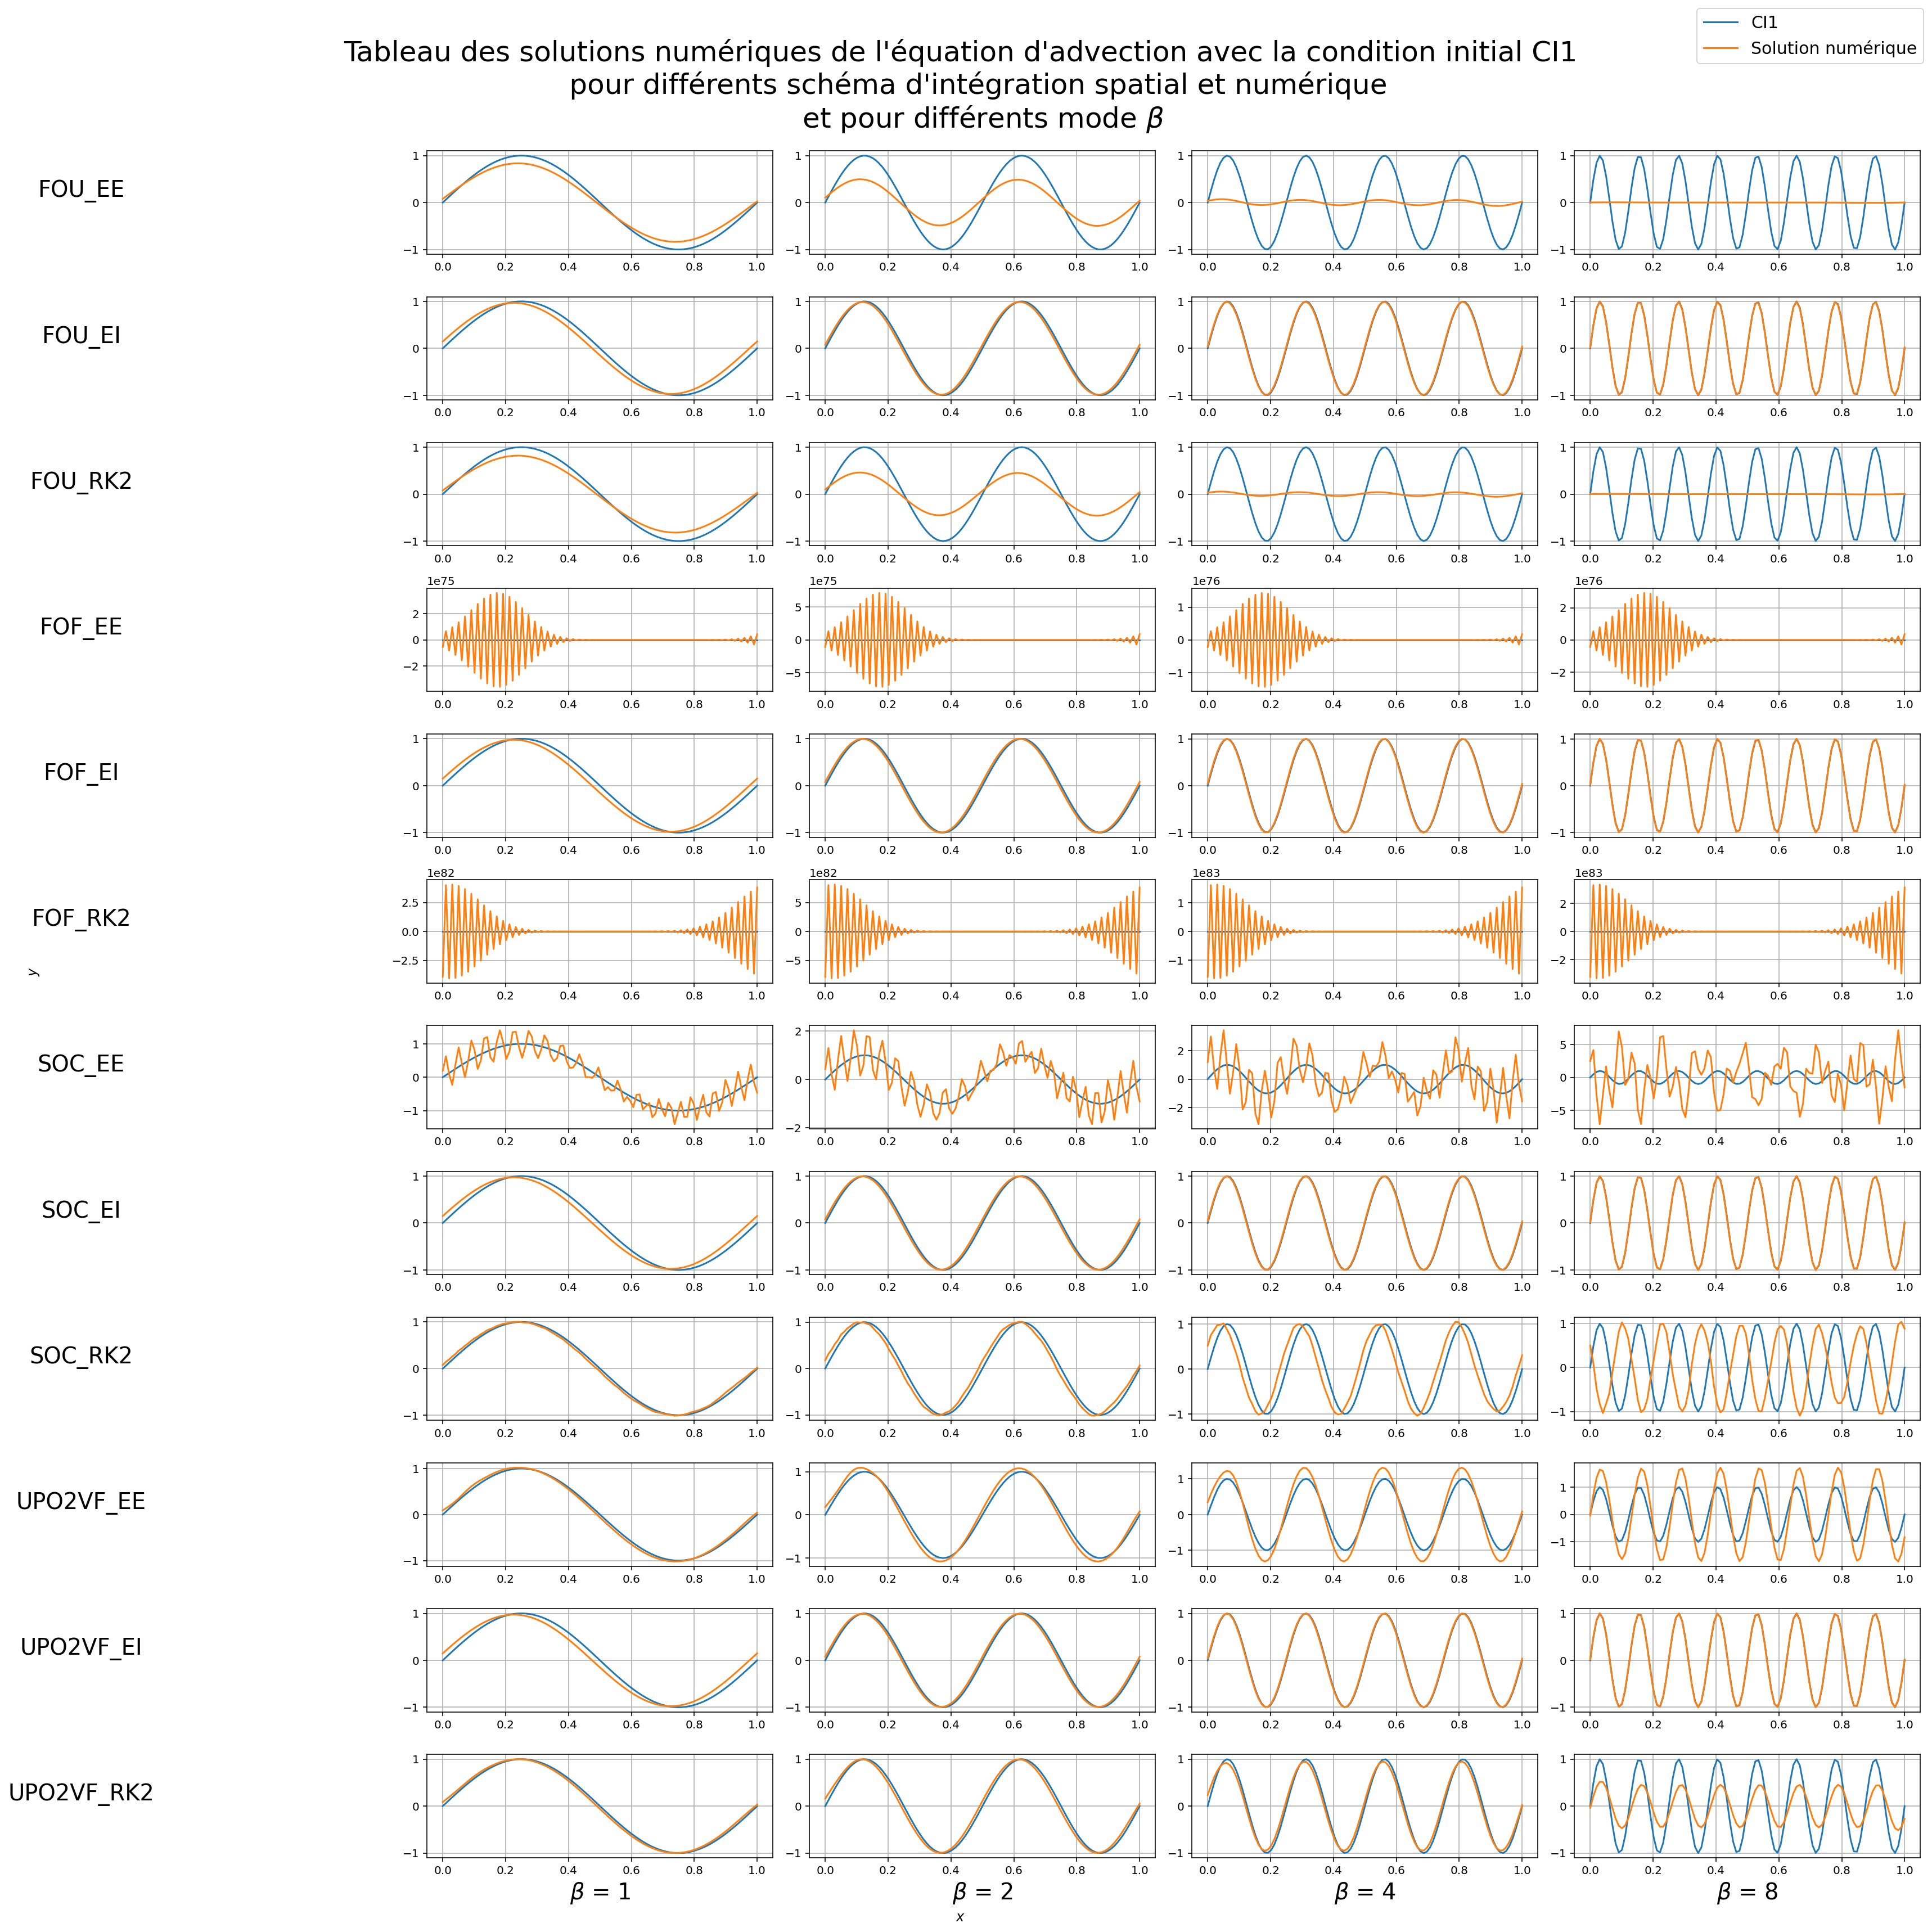

In [173]:
# Variation des solutions pour CI1 selon le mode beta

beta_list = [1, 2, 4, 8]
schema_espace = [FOU, FOF, SOC, UPO2VF]
schema_temps = [EE, EI, RK2]
schema_list = [(sc_esp, sc_tps)
               for sc_esp in schema_espace for sc_tps in schema_temps]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(beta_list), figsize=(24, 24))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial et numérique \n \
    et pour différents mode $\\beta$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")

for i, (sc_esp, sc_tps) in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{sc_esp.__name__}_{sc_tps.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, beta in enumerate(beta_list):
        axs[-1, j].set_xlabel(f"$\\beta$ = {beta}", rotation=0,
                              size=20)
        plot_sol_separation(schema_espace=sc_esp, schema_temps=sc_tps, function_name='CI1', L=1,
                 m=100, C=0.1, a=1.0, beta=beta, x0=0.5, P=1, ax=axs[i, j], trace=False)
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()

In [174]:
# Variation des solutions pour CI2 selon le mode beta

beta_list = [1, 2, 4, 8]
schema_espace = [FOU, FOF, SOC, UPO2VF]
schema_temps = [EE, EI, RK2]
schema_list = [(sc_esp, sc_tps)
               for sc_esp in schema_espace for sc_tps in schema_temps]

fig, axs = plt.subplots(nrows=len(schema_list),
                        ncols=len(beta_list), figsize=(24, 24))
fig.suptitle(
    "Tableau des solutions numériques de l'équation d'advection avec la condition initial CI1\n \
    pour différents schéma d'intégration spatial et numérique \n \
    et pour différents mode $\\beta$\n", fontsize=25)
fig.supxlabel("$x$")
fig.supylabel("$y$")

for i, (sc_esp, sc_tps) in enumerate(schema_list):
    axs[i, 0].set_ylabel(f"{sc_esp.__name__}_{sc_tps.__name__}", rotation=0,
                         size=20)
    axs[i, 0].yaxis.set_label_coords(-1, 0.5)
    for j, beta in enumerate(beta_list):
        axs[-1, j].set_xlabel(f"$\\beta$ = {beta}", rotation=0,
                              size=20)
        plot_sol_separation(schema_espace=sc_esp, schema_temps=sc_tps, function_name='CI2', L=1,
                            m=100, C=0.1, a=1.0, beta=beta, x0=0.5, P=1, ax=axs[i, j], trace=False)
fig.legend([f"CI1", f"Solution numérique"], fontsize=15)
plt.show()
